# ============== 🐧 Penguin Species Classification 🐧 ==============

##  Importing initial relevant packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score

# To ignore the Future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading Data 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv")

In [3]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [5]:
data.shape

(333, 7)

The dataset has 6 features and 1 target feature 'species' with 333 samples.

In [6]:
data.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


The dataset 3 categorical values 'species', 'island' & 'sex'. The data has a varied range of mean of each feature so it would also need to be scaled before prediction.

## Handling Categorical values

The categorical features are encoded here. The target feature 'species' isn't converted yet. It will be separately encoded after data is visualized in detail.We use ordinal encoder to assign value 0,1 or 2 for 'island' and 0 or 1 for 'sex'.

In [7]:
encode = OrdinalEncoder()
columns_to_encode = ['island', 'sex']
data[columns_to_encode] = encode.fit_transform(data[columns_to_encode])
data[columns_to_encode][:5]


,island,sex
0,2.0,1.0
1,2.0,0.0
2,2.0,0.0
3,2.0,0.0
4,2.0,1.0


## Handling missing data

In [8]:
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

The dataset is clean and doesn't have any missing values.

## Data Visualization

In [9]:
Labels = data.species.unique()
Labels

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

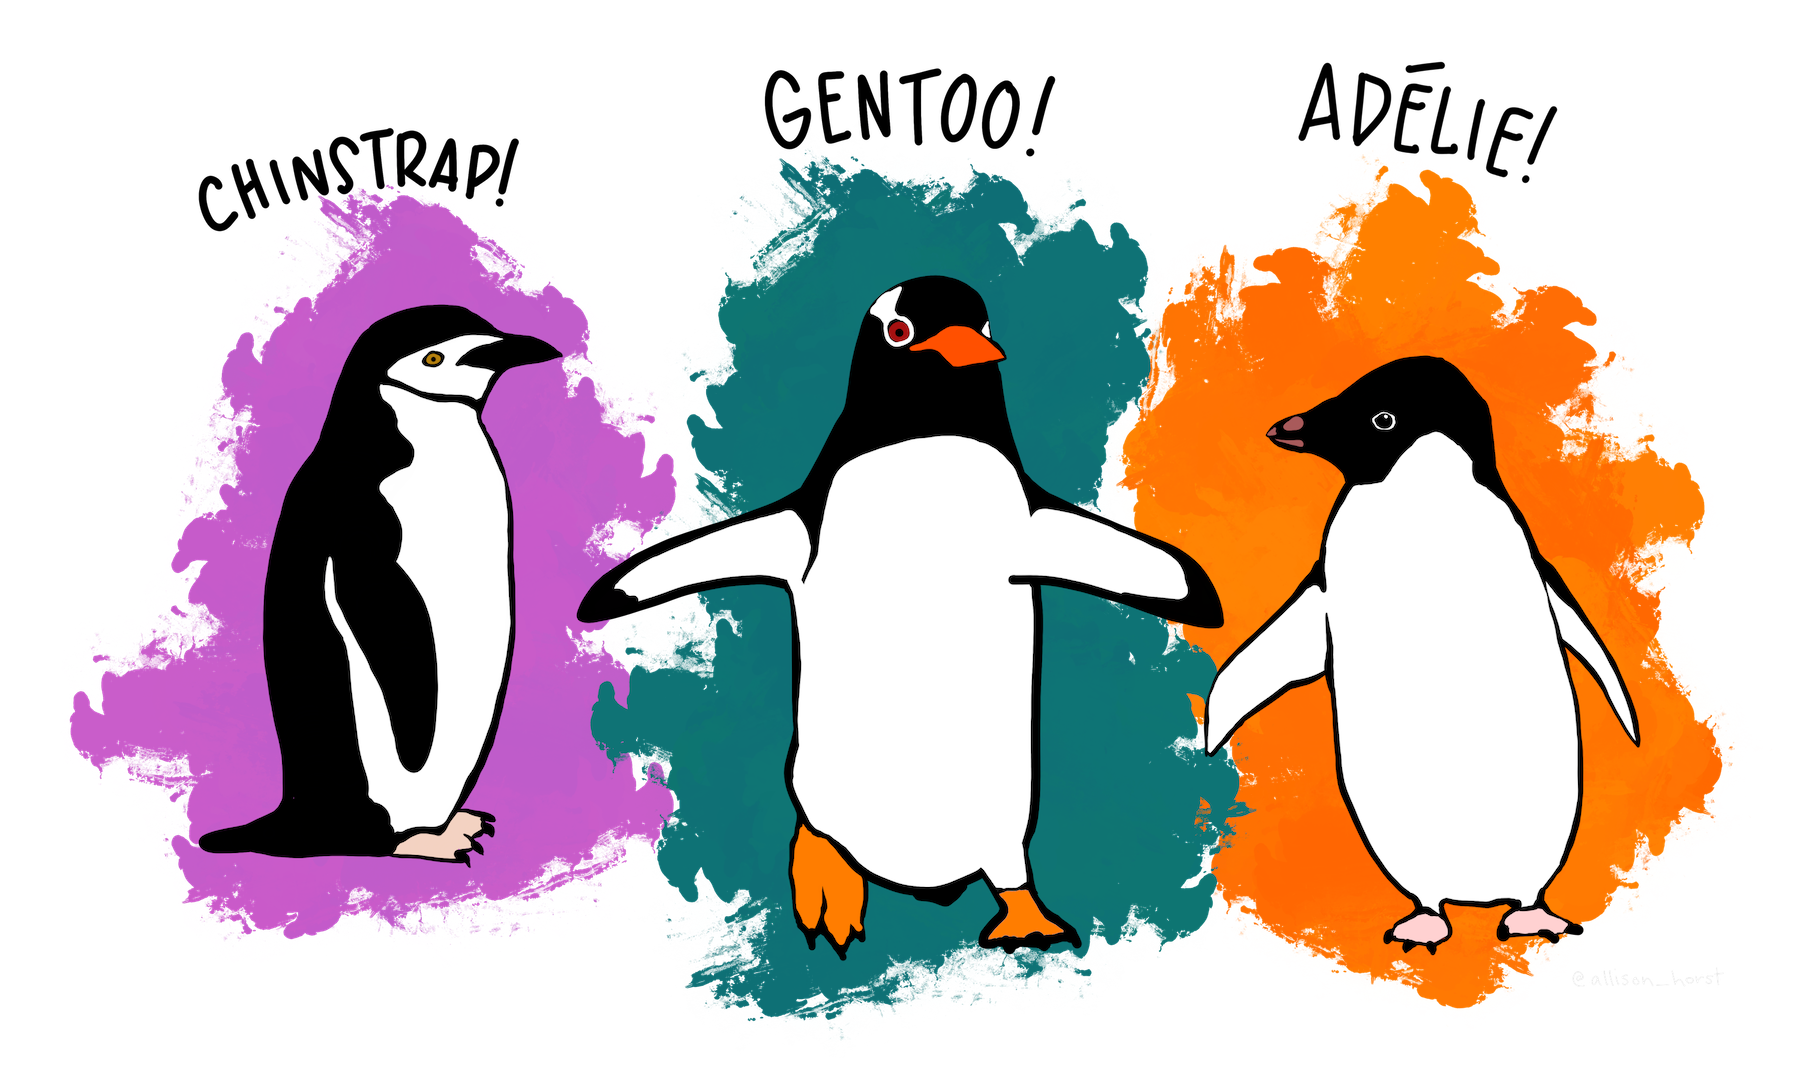

The color palette for each species of Penguin is defined as per the above color scheme

In [10]:
color_palette = ['darkorange','teal','orchid']

Text(0, 0.5, 'Frequency')

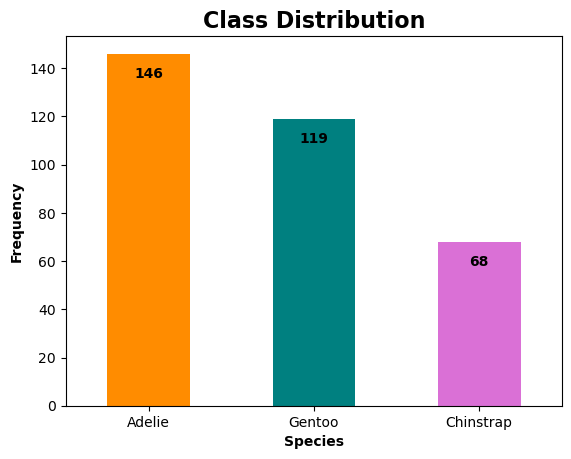

In [11]:
species_count = pd.value_counts(data['species'])
species_count.plot(kind = 'bar', color = color_palette)
plt.title('Class Distribution', fontsize=16, fontweight="bold")

for i, count in enumerate(species_count):
    plt.text(i, count-10, str(count), ha='center', fontweight="bold")
    
plt.xticks(range(3),Labels,rotation = 0)
plt.xlabel('Species', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")

The data is not imbalanced. Now let's check if any features are correlated and redundant.

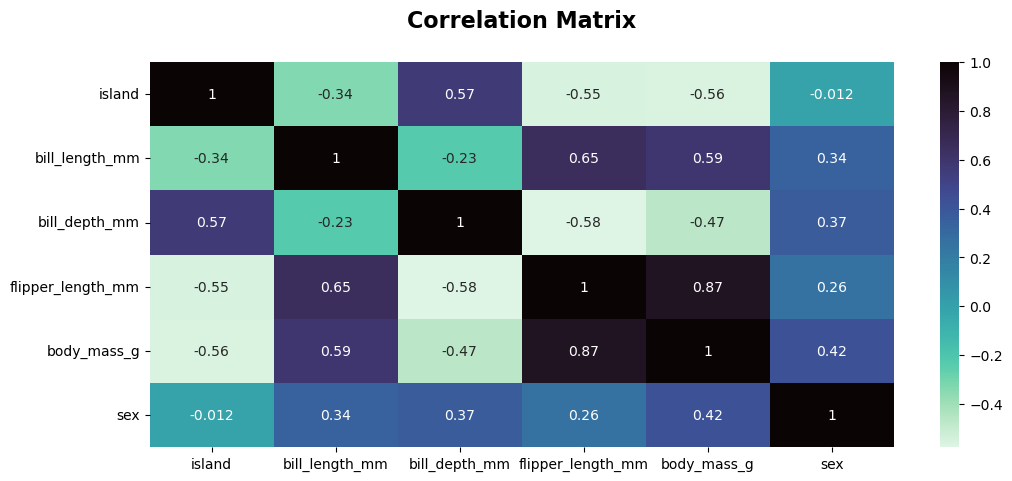

In [12]:
corr = data.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr, cmap='mako_r', annot=True)
plt.title('Correlation Matrix\n', fontsize=16, fontweight="bold")
plt.xticks(rotation = 0)
plt.show()

Here it is evident that only 'flipper_length_mm' and 'body_mass_g' have a high correlation,so none of the features given redundant information. Since we do not have too many features we don't need to eliminate any features.

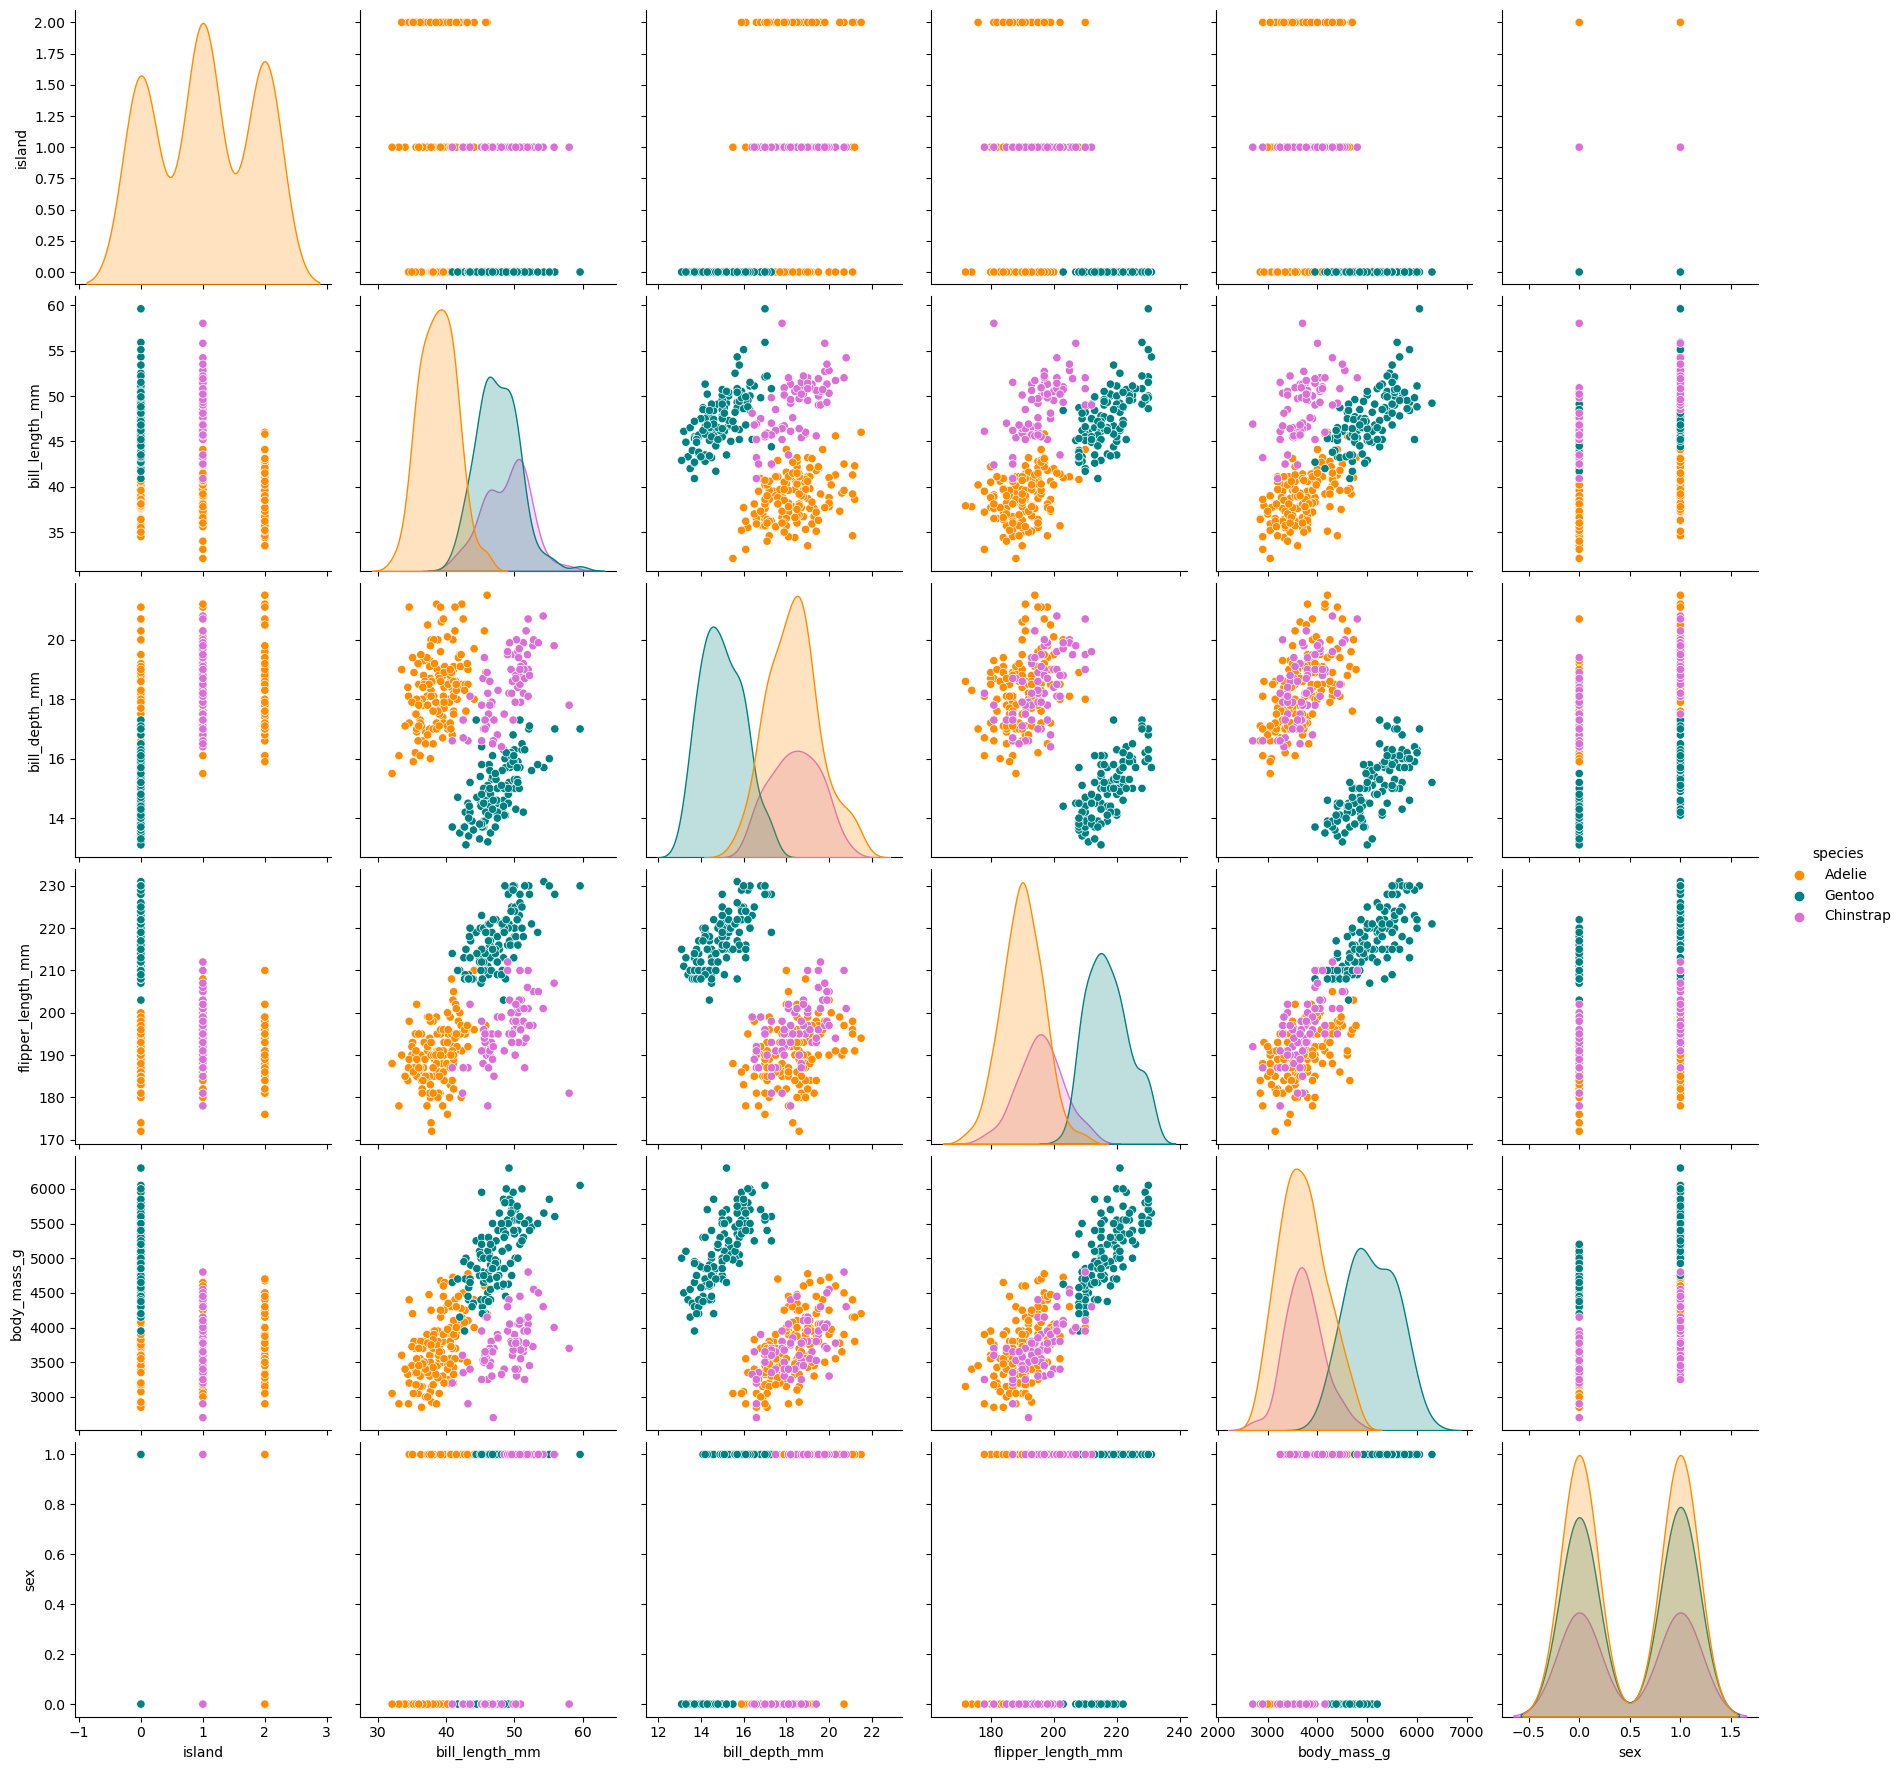

In [13]:
sns.pairplot(data,hue="species",height=3,palette= color_palette)

The above plot shows that the species are easily separable in the following cases:

1. bill_length_mm vs body_mass_g

2. bill_length_mm vs flipper_length_mm

3. bill_length_mm vs bill_depth_mm

## Data preprocessing - Scaling

Now, let's normalize the features before prediction. We only need to standardize the numerical features and so we drop the categorical features i.e. 'island', 'sex', 'species' before scaling.

In [14]:
data_to_scale= data.drop(['island','sex','species'],axis=1)

# Fit and Transform the Standard Scaler
scaler = StandardScaler()
scaler.fit(data_to_scale)
data_scaled = scaler.transform(data_to_scale)

# New dataset with scaled features + the non-numerical features
data_scaled = pd.DataFrame(data_scaled,columns=data_to_scale.columns[:4])
data_scaled[['species', 'island', 'sex']] = data[['species', 'island', 'sex']]

data_scaled.describe(include='all')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,island,sex
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,333,333.000000,333.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,Adelie,NaN,NaN
freq,NaN,NaN,NaN,NaN,146,NaN,NaN
mean,-8.261660e-16,-1.188239e-15,4.350041e-16,2.567182e-17,NaN,0.651652,0.504505
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,NaN,0.714715,0.500732
min,-2.177987e+00,-2.067291e+00,-2.069852e+00,-1.874435e+00,NaN,0.000000,0.000000
25%,-8.227879e-01,-7.958519e-01,-7.836512e-01,-8.172292e-01,NaN,0.000000,0.000000
50%,9.288742e-02,6.872642e-02,-2.834620e-01,-1.953432e-01,NaN,1.000000,1.000000
75%,8.437412e-01,7.807321e-01,8.598276e-01,7.063915e-01,NaN,1.000000,1.000000


All the features are scaled and the categorical values are also encoded except for 'species'. Let's do that and start the prediction.

In [15]:
label_enncode = LabelEncoder()
data_scaled['species']= label_enncode.fit_transform(data['species'])
data_scaled['species'].unique()

array([0, 2, 1])

## Splitting the data
Now The Input X and target Y are assigned. Then the dataset is split into Train-Dev-Test set as 60%-20%-20%

In [16]:
columns = data_scaled.columns.tolist()
columns = [c for c in columns if c not in ['species']]
X = data_scaled.drop('species',axis=1)
Y = data_scaled['species']
print(X.shape,Y.shape)

(333, 6) (333,)


In [17]:
Y.describe()

count    333.000000
mean       0.918919
std        0.889718
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: species, dtype: float64

The Dataset is split in 60-20-20  for Train,Dev & Test respectively

In [18]:
X_train, X_, y_train, y_ = train_test_split(X, Y,test_size=0.40, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=42)

print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (199, 6) y_train.shape (199,)
X_cv.shape (67, 6) y_cv.shape (67,)
X_test.shape (67, 6) y_test.shape (67,)


## Hyperparameter Tuning with GridSearchCV

Three algorithms are trained and will be compared against each other:

1. Logistic Regression
2. KNearestNeighbors Classifier
3. Decision Tree
4. Random Forest Classifier

Logistic Regression doesn't have many hyperparameters that need to tuned. For other algorithms some hyperparameters are put through GridSearchCV for finding the best parameters. The GridSearchCV is just fit to the training set. 

In [19]:
knn_para = {'n_neighbors':range(1,11), 'weights' : ['uniform','distance'], 'p': [1, 2]}

dt_para = {'splitter': ['best','random'], 
           'max_depth': [None,300,500,700], 
           'min_samples_split' : [2,5,8,10], 
           'min_samples_leaf' : [2,5,8,10,20], 
           'max_leaf_nodes': [4,8, None]} 

rf_para = {'n_estimators' : [50,100,200],
           'max_depth' : [50,100,200], 
           'min_samples_split'  : [2,8,10],
           'min_samples_leaf' : [2,8,10], 
           'max_leaf_nodes': [4,8, None]}

In [20]:
gridsearch_models = [("KNearestNeighbors",KNeighborsClassifier(),knn_para), 
                     ("DecisionTree",DecisionTreeClassifier(),dt_para),
                     ("RandomForest",RandomForestClassifier(),rf_para)] 
gridsearch_models

[('KNearestNeighbors',
  KNeighborsClassifier(),
  {'n_neighbors': range(1, 11),
   'weights': ['uniform', 'distance'],
   'p': [1, 2]}),
 ('DecisionTree',
  DecisionTreeClassifier(),
  {'splitter': ['best', 'random'],
   'max_depth': [None, 300, 500, 700],
   'min_samples_split': [2, 5, 8, 10],
   'min_samples_leaf': [2, 5, 8, 10, 20],
   'max_leaf_nodes': [4, 8, None]}),
 ('RandomForest',
  RandomForestClassifier(),
  {'n_estimators': [50, 100, 200],
   'max_depth': [50, 100, 200],
   'min_samples_split': [2, 8, 10],
   'min_samples_leaf': [2, 8, 10],
   'max_leaf_nodes': [4, 8, None]})]

In [21]:
model_params = {}

for name,model,para in gridsearch_models:
    grid = GridSearchCV(model,para,scoring='accuracy')

    grid.fit(X_train,y_train)
    
    print(f"---------Best Params for {name}---------")
    print(grid.best_params_)
    print(f"Best Grid Score: {grid.best_score_}\n")
    

---------Best Params for KNearestNeighbors---------
{'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
Best Grid Score: 1.0

---------Best Params for DecisionTree---------
{'max_depth': 300, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Best Grid Score: 0.9800000000000001

---------Best Params for RandomForest---------
{'max_depth': 50, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}
Best Grid Score: 0.975



Now Let's set these hyperparameters in the algorithms and finally make PREDICTIONS !!!! The entire classification report is shown for Validation and Test sets.

In [22]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier']
value = [LogisticRegression(max_iter=1000), 
         KNeighborsClassifier(n_neighbors = 4, weights ='uniform', p = 2), 
         DecisionTreeClassifier(max_depth = 300,
                                max_leaf_nodes = None,
                                min_samples_leaf = 2,
                                min_samples_split = 10,
                                splitter = 'random',
                                random_state=42), 
         RandomForestClassifier(max_depth = 50, 
                                max_leaf_nodes = None, 
                                min_samples_leaf = 2, 
                                min_samples_split = 8,
                                n_estimators=100,
                                random_state=42)]
classifiers = dict(zip(key,value))
classifiers

{'LogisticRegression': LogisticRegression(max_iter=1000),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=4),
 'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=300, min_samples_leaf=2, min_samples_split=10,
                        random_state=42, splitter='random'),
 'RandomForestClassifier': RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=8,
                        random_state=42)}

In [23]:
test_f1score_plt = []
test_accuracy_plt = []


for classifier_name,classifier_model in classifiers.items() :
    
    classifier_model.fit(X_train,y_train)
    
    dev_accuracy = accuracy_score(y_cv, classifier_model.predict(X_cv))
    dev_classification_report = classification_report(y_cv, classifier_model.predict(X_cv))
    
    test_f1score = f1_score(y_test, classifier_model.predict(X_test),average=None)
    test_accuracy = accuracy_score(y_test, classifier_model.predict(X_test))
    test_classification_report = classification_report(y_test, classifier_model.predict(X_test))
    
    print("=====================")
    print(classifier_name)
    print("=====================")
    print("Model performance on Dev Set\n")
    print("- Accuracy score:", dev_accuracy)
    print("- Classification report :\n", dev_classification_report)
    print('---------------------------------------')
    print("Model performance on Test Set\n")
    print("- Accuracy score:", test_accuracy)
    print("- Classification report :\n", test_classification_report)
    print('\n')
    
    test_f1score_plt.append((test_f1score))
    test_accuracy_plt.append(test_accuracy*100)
    

LogisticRegression
Model performance on Dev Set

- Accuracy score: 1.0
- Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

---------------------------------------
Model performance on Test Set

- Accuracy score: 0.9850746268656716
- Classification report :
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        17

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.99        67
weighted avg       0.99      0.99      0.98        67



KNe

##  Plotting Model Accuracies and respective F1 score

The accuracy of the models in percentage is shown below. The 2nd plot describes the F1 score for each class by all 4 algorithms.

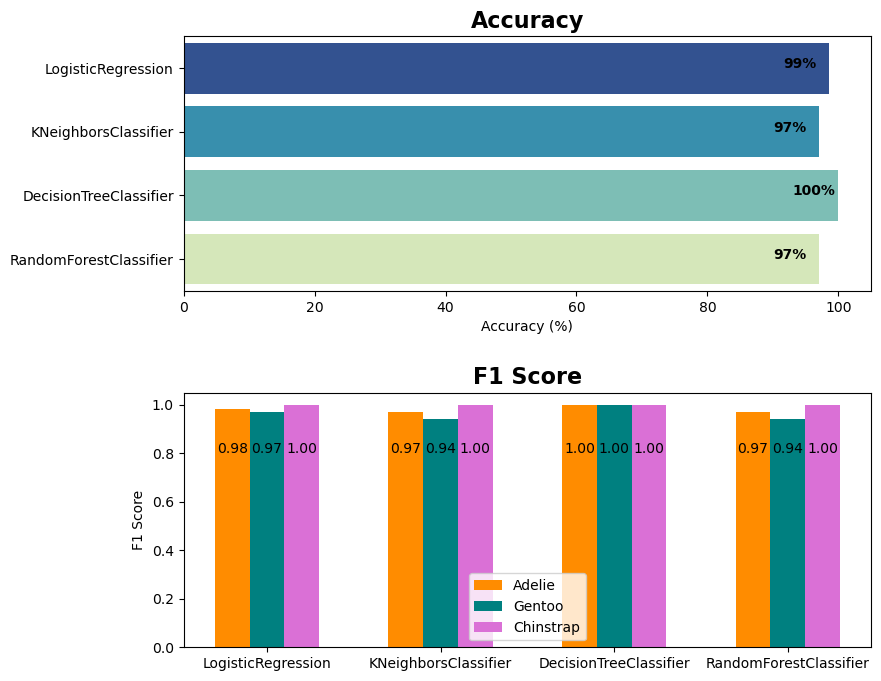

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

######## Plotting Model Accuracies ########

sns.barplot(x = test_accuracy_plt, y = key, palette="YlGnBu_r",ax = ax1)
ax1.set_xlabel('Accuracy (%)')
ax1.set_title("Accuracy", fontsize=16, fontweight="bold")
for i, v in enumerate(test_accuracy_plt):
    ax1.text(v-7, i, f'{round(v)}%', color='black', fontweight='bold')


    
######## Plotting F1 Score for different Models and each Class ########

test_f1score_plt = np.array(test_f1score_plt)  # Array of F1 score for each class and algorithm

bar_width = 0.2                       # Set the width of each bar
x_p=0                                 # Set the position of anotations

x_pos = np.arange(len(key))           # Set the x-axis positions for the bars

for i in range(len(Labels)):          # Plot the bars for each class
    offset = i * bar_width            # Calculate the offset for each class
    ax2.bar(x_pos + offset,           # Plot the bars for each algorithm
            test_f1score_plt[:, i], 
            bar_width, 
            label=Labels[i],
            color = color_palette[i]) 

for i in range(len(key)):
    for j in range(len(Labels)):
        plt.text(x_p, 0.8, f'{test_f1score_plt[i][j]:.2f}', ha='center')    # Annotations
        x_p += 0.2
    x_p += 0.4

ax2.set_xticks(x_pos + bar_width)    
ax2.set_xticklabels(key)
ax2.set_ylabel('F1 Score')
ax2.set_title('F1 Score', fontsize=16, fontweight="bold")
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout(pad=5)
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()


## Conclusion

With the correct hyperparameter tuning Decision Tree performs the best with 100% Accuracy and F1 score of 1 for each class.